In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

vvdm = np.load("/home/douglas/vvdm.001.npy")
vvdisk = np.load("/home/douglas/vvdisk.001.npy")
vvbulge = np.load("/home/douglas/vvbulge.001.npy")
ppdm = np.load("/home/douglas/ppdm.001.npy")
ppdisk = np.load("/home/douglas/ppdisk.001.npy")
ppbulge = np.load("/home/douglas/ppbulge.001.npy")

(-2500, 2500)

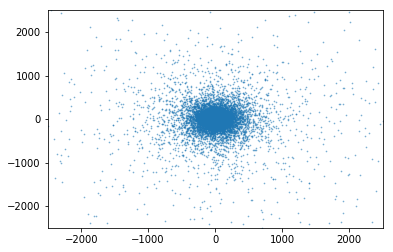

In [3]:
plt.scatter(ppbulge[:,0],ppbulge[:,1], s=0.5,alpha=0.5)
plt.xlim(-2500,2500)
plt.ylim(-2500,2500)

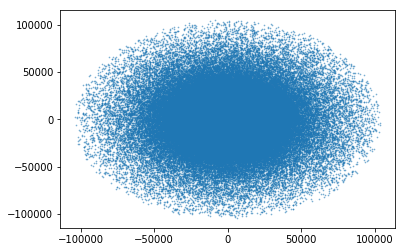

In [4]:
plt.scatter(ppdm[:,0],ppdm[:,1], s=0.5,alpha=0.5)

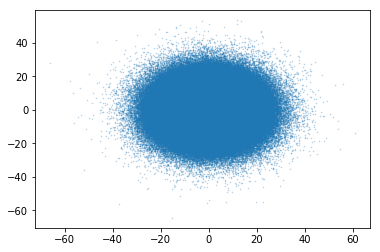

In [5]:
plt.scatter(ppdisk[:,0], ppdisk[:,1], s=0.3, alpha=0.3)

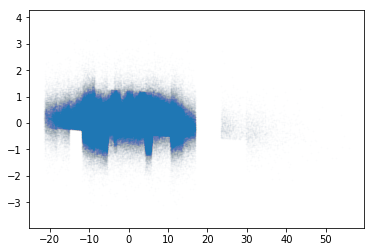

In [6]:
plt.scatter(ppdisk[:1000000,0], ppdisk[:1000000,2], s=0.3, alpha=0.01)

In [7]:
print(ppdisk[:,0].min())
print(ppdisk[:,0].max())

print(ppdisk[:,1].min())
print(ppdisk[:,1].max())

print(ppdisk[:,2].min())
print(ppdisk[:,2].max())

-65.88586772450773
60.872682717665874
-64.45128135017362
53.39205496069764
-5.760559633557132
5.69960468914389


In [8]:
ppbulge = ppbulge/1000
ppdm = ppdm/1000

In [9]:
import agama

In [10]:
bulgemass = np.full((1000000),9.8628186e3)
diskmass = np.full((5000000),1.1880213e4)   #Solar masses
dmass = np.full((39999999), 2.6287773e4)

In [11]:
agama.setUnits(mass=1, length=1, velocity=1)

dark = agama.Potential(type = "Multipole",particles=(ppdm, dmass),symmetry='a', gridsizeR=20, lmax=2)

disk = agama.Potential(type = "CylSpline",particles=(ppdisk, diskmass),gridsizeR=20, gridsizeZ=20,
                        mmax=0, Rmin=0.2, symmetry='a',Rmax=70, Zmin=0.02, Zmax=10)
                       
bulge = agama.Potential(type = "Multipole",particles=(ppbulge, bulgemass),symmetry='a',gridsizeR=20,lmax=2)

In [12]:
potential = agama.Potential(dark, disk, bulge)
af = agama.ActionFinder(potential, interp=False)

In [13]:
bulgepoints = np.hstack((ppbulge,vvbulge))
diskpoints = np.hstack((ppdisk,vvdisk))
dmpoints = np.hstack((ppdm,vvdm))

points = np.vstack((bulgepoints,diskpoints,dmpoints))
print(points.shape)

(45999999, 6)


In [14]:
actions, angles, freq = af(points, angles=True)

#actions in units of (M_sun * kpc * km/s)

KeyboardInterrupt: 

In [ ]:
print(actions.shape)

In [ ]:
print(angles.shape)

In [ ]:
Jrdisk = actions[1000001:6000000, 0]
Jzdisk = actions[1000001:6000000, 1]
Jphidisk = actions[1000001:6000000, 2]

Jrbulg = actions[:1000000, 0]
Jzbulg = actions[:1000000, 1]
Jphibulg = actions[:1000000, 2]

Jrdm = actions[6000001:45999999, 0]
Jzdm = actions[6000001:45999999, 1]
Jphidm = actions[6000001:45999999, 2]

In [ ]:
R = np.sqrt((ppdisk[:,0]**2 + ppdisk[:,1]**2))

plt.scatter(R, Jphidisk, s=0.05, alpha=0.02)
plt.xlim(7.8, 8.5)
plt.ylim(-3000,0)

In [ ]:
plt.scatter(Jphidisk, Jrdisk, s=0.02, alpha=0.02)
plt.xlim(-7000,500)
plt.xlabel("$J_{\phi}\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.title("Disk", fontsize=20)

In [ ]:
plt.scatter(Jphibulg, Jrbulg, s=0.05, alpha=0.05)
plt.ylim(0,200)
plt.xlim(-20,20)
plt.xlabel("$J_{\phi}\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.title("Bulge", fontsize=20)

In [ ]:
plt.scatter(Jphidm, Jrdm, s=0.03, alpha=0.02)
plt.ylim(0,10000)
plt.xlim(-500,500)
plt.xlabel("$J_{\phi}\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} kpc km/s)$", fontsize=12)
plt.title('Dark Matter Halo', fontsize=20)

In [ ]:
Trdisk = angles[1000001:6000001, 0]
Tzdisk = angles[1000001:6000001, 1]
Tphidisk = angles[1000001:6000001, 2]

Trbulg = angles[:1000001, 0]
Tzbulg = angles[:1000001, 1]
Tphibulg = angles[:1000001, 2]

Trdm = angles[6000001:45999999, 0]
Tzdm = angles[6000001:45999999, 1]
Tphidm = angles[6000001:45999999, 2]

In [67]:
Ordisk = freq[1000001:6000001, 0]
Ozdisk = freq[1000001:6000001, 1]
Ophidisk = freq[1000001:6000001, 2]

Orbulg = freq[:1000001, 0]
Ozbulg = freq[:1000001, 1]
Ophibulg = freq[:1000001, 2]

Ordm = freq[6000001:45999999, 0]
Ozdm = freq[6000001:45999999, 1]
Ophidm = freq[6000001:45999999, 2]

In [68]:
from astropy.io import fits
c1 = fits.Column(name='Jr', array=np.array(Jrdisk), format='D', unit = 'kpc2 Myr-1')
c2 = fits.Column(name='Jphi', array=np.array(Jphidisk), format='D', unit = 'kpc2 Myr-1')
c3 = fits.Column(name='Jz', array=np.array(Jzdisk), format='D', unit ='kpc2 Myr-1')
c4 = fits.Column(name='Theta_r', array=np.array(Trdisk), format='D', unit = 'rad')
c5 = fits.Column(name='Theta_phi', array=np.array(Tphidisk), format='D', unit = 'rad')
c6 = fits.Column(name='Theta_z', array=np.array(Tzdisk), format='D', unit='rad')
c7 = fits.Column(name='Freq_r', array=np.array(Ordisk), format='D', unit='Myr-1')
c8 = fits.Column(name='Freq_phi', array=np.array(Ophidisk), format='D',unit='Myr-1')
c9 = fits.Column(name='Freq_z', array=np.array(Ozdisk), format='D', unit='Myr-1')

t = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, c6, c7, c8, c9])

t.writeto('RealChervinDiskActions.fits')

In [70]:
c1 = fits.Column(name='Jr', array=np.array(Jrbulg), format='D', unit = 'kpc2 Myr-1')
c2 = fits.Column(name='Jphi', array=np.array(Jphibulg), format='D', unit = 'kpc2 Myr-1')
c3 = fits.Column(name='Jz', array=np.array(Jzbulg), format='D', unit ='kpc2 Myr-1')
c4 = fits.Column(name='Theta_r', array=np.array(Trbulg), format='D', unit = 'rad')
c5 = fits.Column(name='Theta_phi', array=np.array(Tphibulg), format='D', unit = 'rad')
c6 = fits.Column(name='Theta_z', array=np.array(Tzbulg), format='D', unit='rad')
c7 = fits.Column(name='Freq_r', array=np.array(Orbulg), format='D', unit='Myr-1')
c8 = fits.Column(name='Freq_phi', array=np.array(Ophibulg), format='D',unit='Myr-1')
c9 = fits.Column(name='Freq_z', array=np.array(Ozbulg), format='D', unit='Myr-1')

t = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, c6, c7, c8, c9])

t.writeto('RealChervinBulgeActions.fits')

In [71]:
c1 = fits.Column(name='Jr', array=np.array(Jrdm), format='D', unit = 'kpc2 Myr-1')
c2 = fits.Column(name='Jphi', array=np.array(Jphidm), format='D', unit = 'kpc2 Myr-1')
c3 = fits.Column(name='Jz', array=np.array(Jzdm), format='D', unit ='kpc2 Myr-1')
c4 = fits.Column(name='Theta_r', array=np.array(Trdm), format='D', unit = 'rad')
c5 = fits.Column(name='Theta_phi', array=np.array(Tphidm), format='D', unit = 'rad')
c6 = fits.Column(name='Theta_z', array=np.array(Tzdm), format='D', unit='rad')
c7 = fits.Column(name='Freq_r', array=np.array(Ordm), format='D', unit='Myr-1')
c8 = fits.Column(name='Freq_phi', array=np.array(Ophidm), format='D',unit='Myr-1')
c9 = fits.Column(name='Freq_z', array=np.array(Ozdm), format='D', unit='Myr-1')

t = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, c6, c7, c8, c9])

t.writeto('RealChervinDMActions.fits')

Text(0.5,1,'Disk')

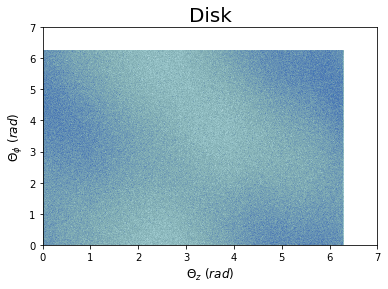

In [77]:
plt.scatter(Tzdisk, Tphidisk, s=0.03, alpha=0.02)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_{\phi}\ (rad)$", fontsize=12)
plt.title("Disk", fontsize=20)

Text(0.5,1,'Bulge')

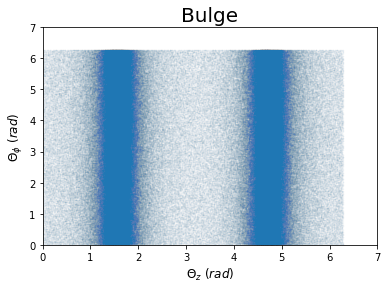

In [78]:
plt.scatter(Tzbulg, Tphibulg, s=0.05, alpha=0.05)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_{\phi}\ (rad)$", fontsize=12)
plt.title("Bulge", fontsize=20)

Text(0.5,1,'Dark Matter Halo')

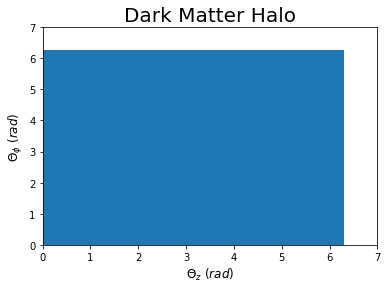

In [79]:
plt.scatter(Tzdm, Tphidm, s=0.01, alpha=0.01)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_{\phi}\ (rad)$", fontsize=12)
plt.title('Dark Matter Halo', fontsize=20)